# image classification - transfer learning 
## overview 
use trained model to classify image 

## requirements
- use image generator
- use data augmentation
- use pretrained_model 
- transfer learning 
- predict picture

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10
import numpy as np
import numpy as np 
import random 

## read pretrained model 

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
#  import VGG19



## edit model

In [3]:
pretrained_model = VGG19(
    input_shape = (32,32,3)
    ,include_top = False
    ,weights = 'imagenet'
)
len(pretrained_model.layers)
pretrained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [4]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [5]:
last_layer = pretrained_model.layers[-1]
last_output  = last_layer.output
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 1, 1, 512)


In [6]:
from tensorflow.keras.layers import Dense , Flatten , Dropout
x = Flatten()(last_output)
x = Dense(units = 1024,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(units = 10,activation = 'softmax')(x)

model = Model(pretrained_model.input,x)
model.compile(
    optimizer = tf.optimizers.Adam(lr = 0.001)
    ,loss = 'sparse_categorical_crossentropy'
   ,metrics = ['accuracy']
)


## load and preprocess data  

In [7]:
(x_train,y_train ), (x_valid , y_valid) = cifar10.load_data()

In [8]:
for df in [ x_train,y_train , x_valid , y_valid]:
  print(type(df))
  print(df.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
<class 'numpy.ndarray'>
(10000, 1)


In [9]:
x_valid = x_valid[:1000]
y_valid = y_valid[:1000]
for df in [x_train,y_train , x_valid , y_valid]:
  print(type(df))
  print(df.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)
<class 'numpy.ndarray'>
(1000, 32, 32, 3)
<class 'numpy.ndarray'>
(1000, 1)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255
    # ,rotation_range = 40
    # ,width_shift_range = 0.2
    # ,height_shift_range = 0.2
    # ,shear_range = 0.2
    # ,zoom_range  = 0.2
    # ,horizontal_flip = True
    # ,vertical_flip = True
)

test_datagen =ImageDataGenerator(
    rescale = 1./255
    # ,rotation_range = 40
    # ,width_shift_range = 0.2
    # ,height_shift_range = 0.2
    # ,shear_range = 0.2
    # ,zoom_range  = 0.2
    # ,horizontal_flip = True
    # ,vertical_flip = True
)

train_generator = train_datagen.flow( 
    x_train
    ,y_train.reshape(-1,)
    ,batch_size = 1024
)

validation_generator =  test_datagen.flow(
    x_valid
    ,y_valid.reshape(-1,)
    ,batch_size = 1024
)

In [11]:
# y_valid

## train

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [13]:
history = model.fit_generator(
    train_generator
    ,epochs = 20
    ,validation_data = validation_generator
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
49/49 [==============================] - 26s 351ms/step - loss: 1.8299 - accuracy: 0.3506 - val_loss: 1.3592 - val_accuracy: 0.5280
Epoch 2/20
49/49 [==============================] - 6s 131ms/step - loss: 1.3560 - accuracy: 0.5259 - val_loss: 1.2619 - val_accuracy: 0.5520
Epoch 3/20
49/49 [==============================] - 7s 133ms/step - loss: 1.2637 - accuracy: 0.5558 - val_loss: 1.2170 - val_accuracy: 0.5670
Epoch 4/20
49/49 [==============================] - 6s 132ms/step - loss: 1.2084 - accuracy: 0.5783 - val_loss: 1.1805 - val_accuracy: 0.5790
Epoch 5/20
49/49 [==============================] - 6s 132ms/step - loss: 1.1790 - accuracy: 0.5883 - val_loss: 1.1589 - val_accuracy: 0.5790
Epoch 6/20
49/49 [==============================] - 6s 131ms/step - loss: 1.1459 - accuracy: 0.6025 - val_loss: 1.1359 - val_accuracy: 0.5940
Epoch 7/20
49/49 [==============================] - 6s 131ms/step - loss: 1.1144 - accuracy: 0.6124 - val_loss: 1.1252 - val_accuracy: 0.5910
Epoch

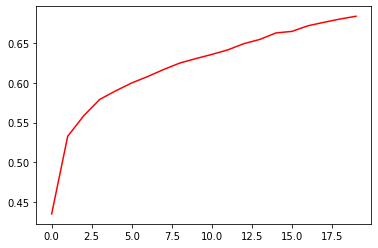

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')